
Temujin U. Lampasa
October 8, 2021

I/we certify that this submission complies with the DISCS Academic Integrity Policy.

If I/we have discussed my/our Python language code with anyone other than my/our instructor(s), my/our groupmate(s), the teaching assistant(s), the extent of each discussion has been clearly noted along with a proper citation in the comments of my/our program. If any Python language code or documentation used in my/our program was obtained from another source, either modified or unmodified, such as a textbook, website, or another individual, the extent of its use has been clearly noted along with a proper citation in the comments of my/our program.

# Quiz/Hands-on: Exploring extracted tweets

**Note:** Although the quiz directions indicate to use the previously extracted tweets, I found them to be unsuitable for this activity, as there were not enough data points and it was of a boring topic. Instead, I have rewritten the extract_tweets notebook and scraped 500 tweets from a different topic. The notebook can be found here: https://github.com/temujin-lampasa/social_computing/blob/main/notebooks/extract_tweets.ipynb


In [250]:
!pip install -q pandas numpy sklearn

In [ ]:
!python -m spacy download en_core_web_sm

In [331]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 13})


import re
import os

import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/TL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
# Open tweets csv
df = pd.read_csv("../resources/tweets.csv", sep="|")
df

,date,handle,text
0,Fri Oct 08 12:15:32 +0000 2021,DakotaDW_,"RT @Vahn16: if I was ""committed to making acti..."
1,Fri Oct 08 12:15:15 +0000 2021,ACanadianHorse,RT @Kotaku: California steps in to prevent Act...
2,Fri Oct 08 12:15:07 +0000 2021,CHFHope,Which of these flavours is your fave? \nShare ...
3,Fri Oct 08 12:14:46 +0000 2021,ItsOasus,RT @Kotaku: California steps in to prevent Act...
4,Fri Oct 08 12:14:37 +0000 2021,ali18pot,RT @dk_deters: CHRISTMAS ONCE AGAIN\nA missing...
...,...,...,...
495,Fri Oct 08 08:11:48 +0000 2021,Stubborn_Tort,"RT @Vahn16: if I was ""committed to making acti..."
496,Fri Oct 08 08:11:26 +0000 2021,sguedex,"RT @Vahn16: if I was ""committed to making acti..."
497,Fri Oct 08 08:11:18 +0000 2021,y0ungsean,Taking a hobbit through a blizzard with ⁦@vala...
498,Fri Oct 08 08:11:07 +0000 2021,JayromeMarzan,RT @LambySeriesGG: Courtesy of Blizzard i have...


## Prepare and Clean Corpus

In [145]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [146]:
# Get list of stopwords
stop = set(stopwords.words('english'))

# Add interjections like uhh, fuck
stop.update(['fuck', 'fucking'])
stop.update([f"u{'h'*i}" for i in range(10)])

In [238]:
def clean_text(text: str, nlp: spacy.lang.en.English)->str:    
    
    # Remove leading and trailing whitespaces
    text = text.strip()
    
    # Lowercase
    text = text.lower()
    
    # Remove twitter handles
    text = re.sub('@[\w\d]+', '', text)
    
    # Tokenize and Lemmatize
    doc = nlp(text)
    
    # Build new string from processed tokens
    result_string = ""
    
    for token in doc:
        # Remove stopwords
        if token.text in stop:
            continue
        
        word = token.lemma_
    
        # Remove any special characters for each word
        word = re.sub('[^A-Za-z0-9\.]+', '', word)
    
        # Remove consecutive whitespaces
        # (they may have formed after the previous transformations)
        word  = re.sub('\s+', ' ', word)
        
        # Add to resulting string
        if not word:
            continue
        
        if word != "." and len(result_string)!=0:
            result_string += " " + word
        else:
            result_string += word
            
    return result_string
    

def clean_df(df: pd.DataFrame) -> pd.DataFrame:
    if not isinstance(df, pd.DataFrame):
        raise TypeError(f"Error: df must be of type pd.DataFrame.")
        
    cleaned_df = df.copy()
        
    # Remove blank tweets
    cleaned_df['text'].replace("", np.nan, inplace=True)
    cleaned_df.dropna(subset=['text'], inplace=True)
    cleaned_df['text'] = df['text'].apply(lambda x: clean_text(x, nlp))
    
    return cleaned_df

In [245]:
# Test
test_text = "      @jeff @jeffrey @jeffreys This is my tweet. There are many like it. But this one is mine. "
clean_text(test_text, nlp)

'tweet. many like. one mine.'

In [244]:
cleaned_df = clean_df(df)
cleaned_df

,date,handle,text
0,Fri Oct 08 12:15:32 +0000 2021,DakotaDW_,rt commit make activision blizzard welcoming i...
1,Fri Oct 08 12:15:15 +0000 2021,ACanadianHorse,rt california step prevent activision blizzard...
2,Fri Oct 08 12:15:07 +0000 2021,CHFHope,flavour fave share blizzard treat friend famil...
3,Fri Oct 08 12:14:46 +0000 2021,ItsOasus,rt california step prevent activision blizzard...
4,Fri Oct 08 12:14:37 +0000 2021,ali18pot,rt christmas miss painting christmas blizzard ...
...,...,...,...
495,Fri Oct 08 08:11:48 +0000 2021,Stubborn_Tort,rt commit make activision blizzard welcoming i...
496,Fri Oct 08 08:11:26 +0000 2021,sguedex,rt commit make activision blizzard welcoming i...
497,Fri Oct 08 08:11:18 +0000 2021,y0ungsean,take hobbit blizzard check eng evernight unsch...
498,Fri Oct 08 08:11:07 +0000 2021,JayromeMarzan,rt courtesy blizzard 3 lich king 3 diablo merc...


## Get Document Term Matrix (DTM)

In [258]:
corpus = cleaned_df['text'].values 

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(corpus)

In [259]:
vectorizer.get_feature_names()

['001',
 '055',
 '070128',
 '10',
 '100',
 '1006',
 '1021',
 '12',
 '1224',
 '12th',
 '15',
 '17',
 '18',
 '18641b',
 '186aee',
 '18997b',
 '18ec9c',
 '1977',
 '1977s',
 '1980',
 '1996',
 '20',
 '200',
 '2004',
 '2021',
 '2022',
 '2023',
 '23',
 '24',
 '31748',
 '3mrrkeekrkeek4',
 '730206',
 '75',
 '78',
 '900',
 'abandon',
 'abetterabk',
 'abk',
 'able',
 'absolutely',
 'abt',
 'abuse',
 'abusement',
 'accept',
 'account',
 'accountable',
 'accuse',
 'achieve',
 'acount',
 'across',
 'acti',
 'activ',
 'activision',
 'actually',
 'ad',
 'add',
 'address',
 'admin',
 'aerowheel',
 'afraid',
 'afterglow',
 'agency',
 'ago',
 'agree',
 'ai',
 'alex',
 'allegation',
 'alone',
 'alot',
 'already',
 'also',
 'always',
 'amazing',
 'americans',
 'amp',
 'ana',
 'anniversary',
 'annoying',
 'anon',
 'another',
 'anyone',
 'anything',
 'apart',
 'ape',
 'apocalypse',
 'app',
 'appreciate',
 'approach',
 'arkane',
 'arlington',
 'arm',
 'around',
 'arreat',
 'arrow',
 'arse',
 'art',
 'artcoren

In [265]:
dtm.sum(axis=0)

matrix([[1, 1, 1, ..., 1, 2, 1]])

### Get frequencies

In [268]:
vectorizer.vocabulary_.items()

dict_items([('rt', 1159), ('commit', 300), ('make', 856), ('activision', 52), ('blizzard', 154), ('welcoming', 1453), ('inclusive', 728), ('safe', 1168), ('workplace', 1477), ('possible', 1057), ('would', 1482), ('simply', 1226), ('california', 189), ('step', 1287), ('prevent', 1067), ('destroy', 412), ('sexual', 1205), ('harassment', 665), ('evidence', 519), ('httpst', 703), ('co7ut0j1uxxk', 244), ('co', 236), ('flavour', 575), ('fave', 549), ('share', 1208), ('treat', 1385), ('friend', 596), ('family', 541), ('colleague', 289), ('client', 232), ('miracle', 893), ('day', 390), ('get', 622), ('quick', 1095), ('cold', 287), ('pre', 1063), ('order', 966), ('form', 589), ('due', 463), ('october', 950), ('15', 10), ('download', 449), ('corrbpoi4jon', 333), ('cocnhbk4sak9', 262), ('christmas', 225), ('miss', 896), ('painting', 992), ('magical', 853), ('romance', 1154), ('wrpbks', 1487), ('sweetromance', 1331), ('quickread', 1096), ('ad', 54), ('stop', 1290), ('play', 1031), ('game', 605), (

In [283]:
def get_word_frequencies(dtm: "sparse matrix", vectorizer: CountVectorizer) -> dict:
    # Get total freq for each word
    total = dtm.sum(axis=0)
    # Map words onto totals
    word_freqs = {word: total[0, idx] for word, idx in vectorizer.vocabulary_.items()}
    return word_freqs

In [299]:
word_frequencies = get_word_frequencies(dtm, vectorizer)
top_10_words = dict(sorted(list(word_frequencies.items()), key=lambda x: x[1], reverse=True)[:10])

# Visualizations

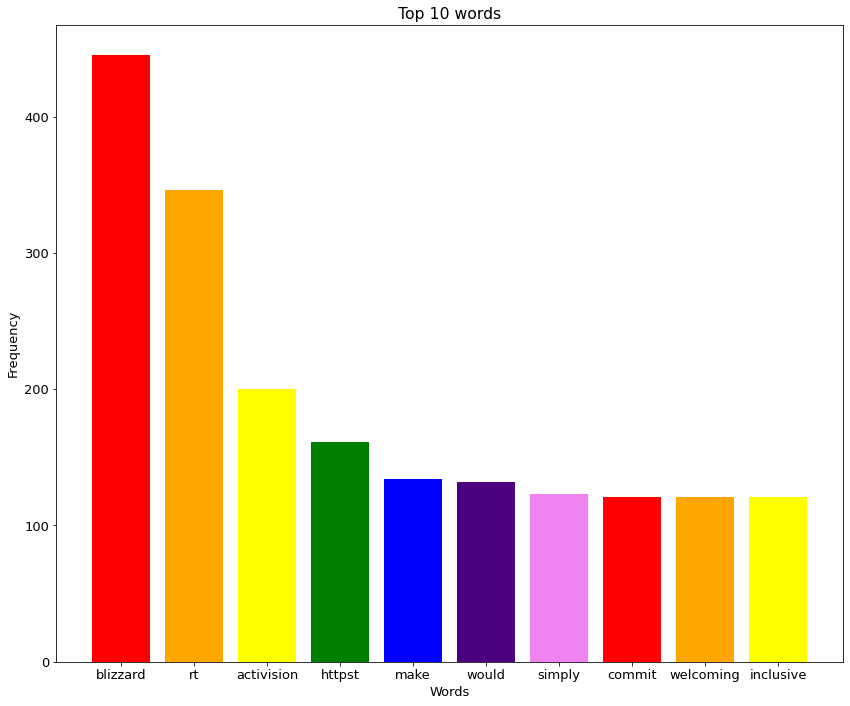

In [336]:
f, ax = plt.subplots(figsize=(12, 10))
mycmap = plt.get_cmap("viridis")
ax.bar(top_10_words.keys(), top_10_words.values(), color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
ax.set_title("Top 10 words")
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()